# TP1 : introduction to digital images

In this tutorial, a few images are provided, but you are strongly encouraged to retrieve and experiment with other images from the web.

The image processing practical exercises are carried out in Python3, using the [scikit-image](http://scikit-image.org/docs/stable/) library. The arrays (`ndarray`) used by this library to manipulate images come from the [numpy](https://docs.scipy.org/doc/) library. Images and other figures are displayed using [matplotlib](https://matplotlib.org/contents.html). The documentation for these three libraries will come in very handy.

In this lab, questions will be indicated in a **question** block, and answers will be given in the **answer** block below the question block. Your answers should be written in [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). This will allow you to answer not only with text, but also with tables and images.

:::{important}
The questions asked in this tutorial generally **require short but justified answers**. A simple yes or no is of no use to us in judging your understanding of the question and its answer...
:::

:::{warning}
Sometimes there are several sub-questions in the same question. **Please remember to answer all sub-questions**.
:::

## Image representation

- We'll start by loading and displaying an image using the code below.

In [1]:
%pip install -q ipywidgets==8.1.1 scikit-image matplotlib ipympl
%matplotlib inline
# the first line is used to install the python packages we'll need for our practical work
# the second line allows you to display the figures directly in your notebook and interact with them.

Note: you may need to restart the kernel to use updated packages.


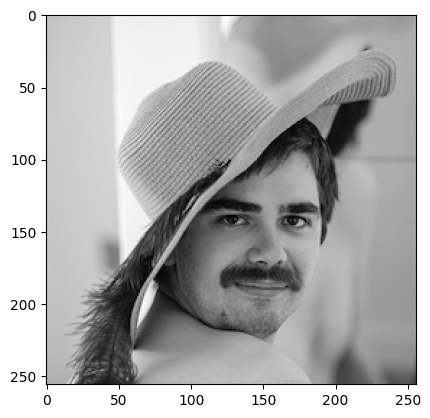

data type: <class 'numpy.ndarray'>
type of each element: uint8
number of dimensions: 2
dimensions details: (256, 256)


In [2]:
from skimage import io # we load the module for opening images
import matplotlib.pyplot as plt # this one is for figures
import ipywidgets as widgets # and that one for interactive widgets
import numpy as np # for direct manipulation if ndarray and other related functions

def loadImage( image_path ):
    # we open and display a greyscale image
    im = io.imread(image_path)
    plt.imshow(im, cmap='gray')
    plt.show()

    # lets display some information
    print('data type:', type(im))
    print('type of each element:', im.dtype)
    print('number of dimensions:', im.ndim)
    print('dimensions details:', im.shape)
    
    return im
    
plt.figure('A grayscale image')
lena_gray=loadImage('../standard_test_images/lena_gray_256.png')

**Question 1:** From the information shown above, explain how this digital image is represented.

**Answer 1:** This image is represented using a Numpy 2-dimensional array of 8-bit unsigned integer values.

- Now lets load a color image

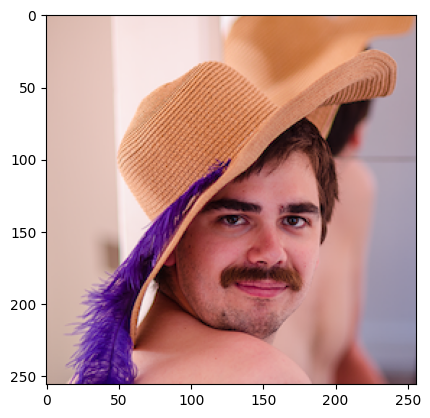

data type: <class 'numpy.ndarray'>
type of each element: uint8
number of dimensions: 3
dimensions details: (256, 256, 3)


In [3]:
plt.figure('A color image')
lena=loadImage('../standard_test_images/lena_color_256.png')

**Question 2:** From the information shown above, explain how this color image is represented. In particular, how does it differ from a grayscale image?

**Answer 2:** This image is represented using a Numpy 2-dimensional array of three-value arrays of 8-bit unsigned integer values (Three dimensions in total). Each one of the three integers represents the intensity of one of the colors, in the RGB order.

**Question 3:**  please complete the code below so as to display only the red channel (channel `0`) of the `lena` image

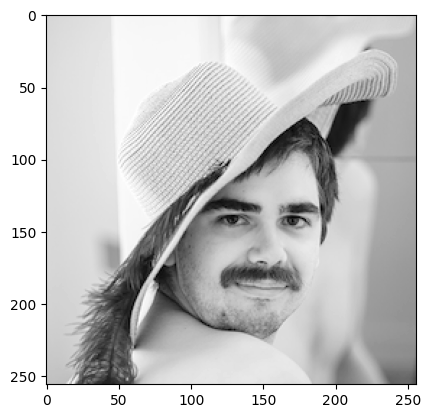

In [ ]:
# Answser 3
red_channel = [[pixel[0] for pixel in line] for line in lena]
plt.figure('The red channel of Lena image')
plt.imshow(red_channel, cmap='gray')
plt.show()

- What about loading a video ? We'll not directly load a video, but an animated GIF (this is equivalent).

In [13]:
res = io.MultiImage('Images/video-to-gif-sample.gif', False)
video = res[0]
# display a video frame
def display_frame(frame_number):
    frame = video[frame_number]
    plt.imshow(frame)
    plt.show()

plt.figure('A frame from a video')
widgets.interact(display_frame, 
                frame_number=widgets.IntSlider(value=0, min=0, max=video.shape[0]-1,))
# lets display some information
print("data type:", type(video))
print("number of dimensions:",video.ndim)
print("dimensions details:", video.shape)

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=0, description='frame_number', max=34), Output()), _dom_classes=('widget…

data type: <class 'numpy.ndarray'>
number of dimensions: 4
dimensions details: (35, 197, 350, 3)


**Question 4:** From the information shown above, explain how this video is represented.

**Answer 4:** This video is represented as an array of Numpy 2-dimensional arrays, containing three-value arrays of 8-bit unsigned integers (four dimensions in total). Each Numpy array is a frame in the video.

## Basic operations on images

Since an image is a (N dimensions, with usally D=2) regular grid of values (or vectors) it can be manipulated with all the tools that apply for N dimentional arrays (numpy `ndarray`). 
Let's perform a few basic operations on images and see (and comment) what happens.

### Add a scalar value to the image

The code below adds 50 to all pixels values of the image. 

:::{note}
Please note that (thanks to numpy) we don't need to use any loop. This is called vectorization and helps having (relatively) fast processing in python.
:::

Type of each element: uint8
Min & max of lena_gray: 0 247
Min & max lena_add_50: 0 255


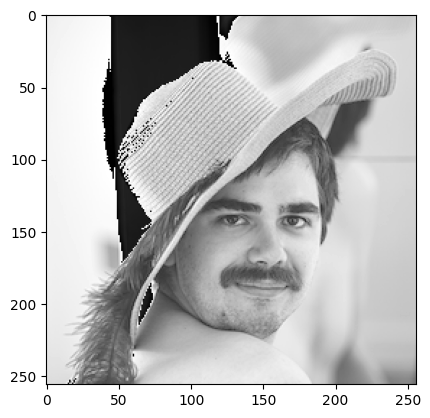

In [8]:
lena_add_50 = lena_gray+50
print('Type of each element:', lena_gray.dtype)
print('Min & max of lena_gray:', lena_gray.min(), lena_gray.max())
print('Min & max lena_add_50:', lena_add_50.min(), lena_add_50.max())
plt.figure('Add 50 to lena')
plt.imshow(lena_add_50, cmap='gray')
plt.show()

**Question 5:** 
- Does the result correspond to what you were expecting ? 
- What happened ? 
- How can we solve this "problem" (please add your corrected code below) ?
    * See numpy documentation for `astype()` and (maybe) `clip()`
- Now that the "problem" is solved what is the effect of this addition on the image

**Answer 5:** The result is quite different to what I expected, as it seems the increased values are localized to a specific area behind Lena. As the image is encoded using 8-bit values, this is likely because some values reach the maximum of 255 and overflow when 50 is added.

Type of each element: uint8
Min & max of lena_gray: 0 247
Min & max lena_add_50: 50 255


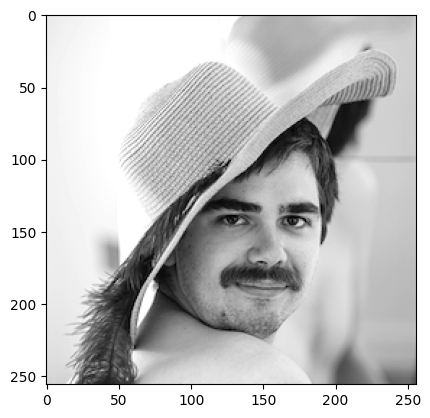

In [20]:
lena_add_50 = (lena_gray.astype(np.uint16)+50).clip(0,255).astype(np.uint8)
print('Type of each element:', lena_add_50.dtype)
print('Min & max of lena_gray:', lena_gray.min(), lena_gray.max())
print('Min & max lena_add_50:', lena_add_50.min(), lena_add_50.max())
plt.figure('Add 50 to lena')
plt.imshow(lena_add_50, cmap='gray')
plt.show()

By changing the type of values used to 16-bit unsigned integers when we add 50 and then converting back down to 8-bit, we avoid the overflow problem, and obtain an image that looks a lot lighter than the base image.

### Other operators (scalar values)

**Questions 6, 7 and 8:** As in question 5, test and comment the effect of the following operations on the Lena image. You'll also need to fix the code so that there is no side effect.

#### Subtract a scalar value from the image

Type of each element: uint8
Min & max of lena_gray: 0 247
Max & max of lena_sub_50: 0 197


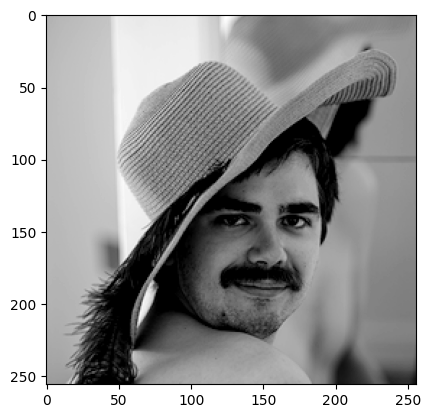

In [23]:
lena_sub_50 = (lena_gray.astype(np.int16)-50).clip(0,255).astype(np.uint8)
print('Type of each element:', lena_sub_50.dtype)
print('Min & max of lena_gray:', lena_gray.min(), lena_gray.max())
print('Max & max of lena_sub_50:', lena_sub_50.min(), lena_sub_50.max())
plt.figure('Subtract 50 from lena')
plt.imshow(lena_sub_50, cmap='gray')
plt.show()

**Answer 6:** Since we subsctract, we witness the opposite effect from adding 50. The image becomes noticeably darker.

#### Mutiply the image by a scalar

Type of each element: uint8
Min & max of lena_gray: 0 247
Min & max of lena_mult_1_2: 0 255


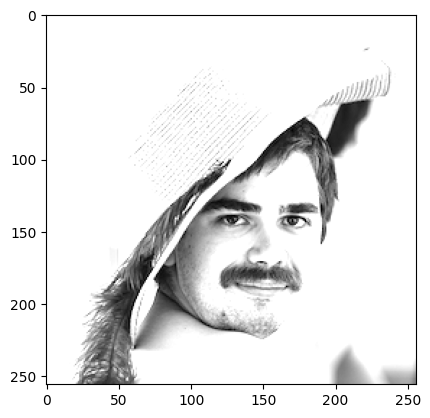

In [24]:
lena_mult_1_2 = (lena_gray.astype(np.uint16)*2).clip(0,255).astype(np.uint8)
print('Type of each element:', lena_mult_1_2.dtype)
print('Min & max of lena_gray:', lena_gray.min(), lena_gray.max())
print('Min & max of lena_mult_1_2:', lena_mult_1_2.min(), lena_mult_1_2.max())
plt.figure('Multiply Lena by 1.2')
plt.imshow(lena_mult_1_2, cmap='gray', vmin=0, vmax=255) # we specify min and max values to avoid any normalization before display
plt.show()

**Answer 7:** Since we are multiplying, instead of the whole image getting lighter in proportion, the spots that had low values (the darker parts of the image) do not change as much as the light parts that become entirely white.

#### Divide the image by a scalar

Type of each element: float64
Min & max of lena_gray: 0 247
Min & max of lena_mult_1_2: 0.0 123.5


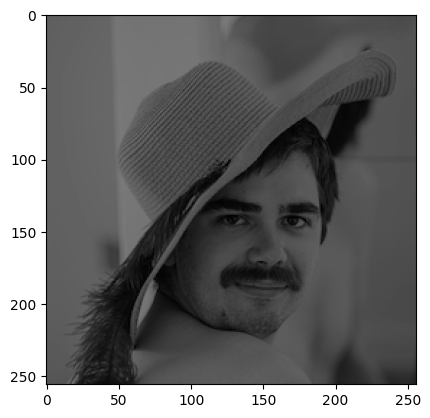

In [25]:
lena_div_1_2 = lena_gray/2
print('Type of each element:', lena_div_1_2.dtype)
print('Min & max of lena_gray:', lena_gray.min(), lena_gray.max())
print('Min & max of lena_mult_1_2:', lena_div_1_2.min(), lena_div_1_2.max())
plt.figure('Divide Lena by 1.2')
plt.imshow(lena_div_1_2, cmap='gray', vmin=0, vmax=255) # we specify min and max values to avoid any normalization before display
plt.show()

**Answer 8:** This effectively has the opposite effect from multiplying. Multiplying increased the difference between the lighter and darker parts of the image, while dividing reduces the higher values more than the low values, thus bringing all the values closer together and making the image more uniform.

### Operations on two images

The same operations that you have used between images and scalars can also be used to combine different images.

**Question 9:** complete the code cell below in order to remove the face of lena and replace it with the new face image. Don't forget to comment your code in order to explain what you have done.

171.23458401549095


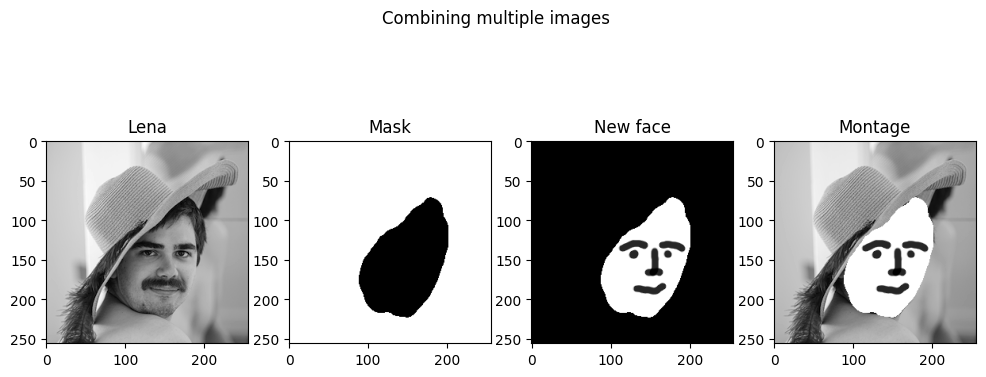

In [39]:
# Lets create a new figure which contains one line with 4 subplots 
fig, axes = plt.subplots(1,4)
fig.suptitle('Combining multiple images')

axes[0].imshow(lena_gray, cmap='gray')
axes[0].set_title('Lena')

mask = io.imread('Images/face_mask_256.png')
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask')

face = io.imread('Images/new_face_256.png')
axes[2].imshow(face, cmap='gray')
axes[2].set_title('New face')

# YOU HAVE TO PUT YOUR CODE BELOW
montage = lena_gray*(mask/255)+face
print(montage.mean())
axes[3].imshow(montage, cmap='gray')
axes[3].set_title('Montage')

# our figure needs to be larger since it contains 4 subfigures
fig.set_figwidth(12)
plt.show()

## Measuring image degradation

We will now compare the loss of image quality that is resulting from different image operations. What is important here is not the operations performed on the images but how we can measure the difference between two version of an image, and (most important) how it is correlated with your (human) perception of those degradations.

Noise


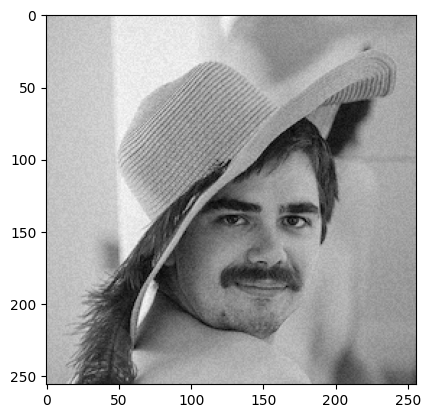

MSE: 133.29420201853665
PSNR: 26.882691018225366
SSIM: 0.8084196305751847

Blur


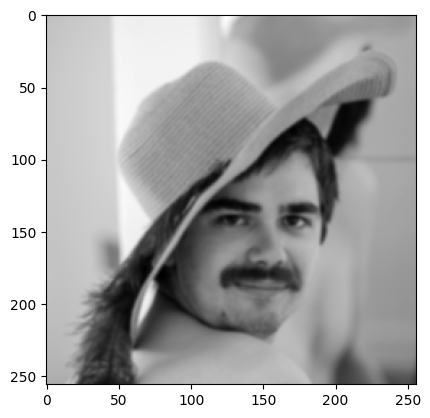

MSE: 82.8253423213001
PSNR: 28.949171213492953
SSIM: 0.8836353215306052

Median


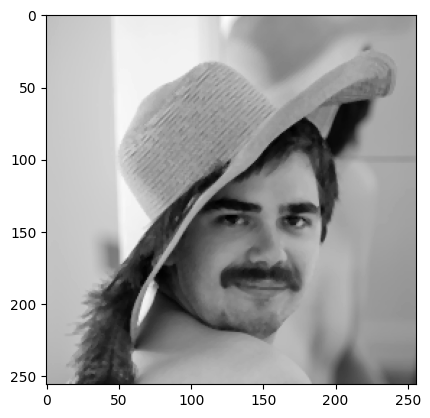

MSE: 61.909515380859375
PSNR: 30.213229564389557
SSIM: 0.9085605058047646


In [48]:
from skimage import filters
from skimage import metrics

distorted={}
distorted['Noise']=lena_gray + np.random.uniform(0,20,lena_gray.shape)
distorted['Blur']=255*filters.gaussian(lena_gray,1) 
distorted['Median']=filters.median(lena_gray) 

def measure(distortion):
    plt.figure(distortion)
    plt.imshow(distorted[distortion], cmap='gray')
    plt.show()

    mse = metrics.mean_squared_error(lena_gray, distorted[distortion])
    psnr = metrics.peak_signal_noise_ratio(lena_gray, distorted[distortion], data_range=255)
    ssim = metrics.structural_similarity(lena_gray, distorted[distortion], data_range=255)
    print("MSE:", mse)
    print("PSNR:", psnr)
    print("SSIM:", ssim)

print('Noise')
measure('Noise')
print('\nBlur')
measure('Blur')
print('\nMedian')
measure('Median')

**Question 10:** Find the definition of each of those (simple) distortion metrics (MSE, PSNR, SSIM). Comment on the correlation between the metric's values and your own subjective experience of image quality (you can test with different images).

**Answer 10:** Multiple metrics exist to measure distortion on images.
MSE (Mean Squared Error) is the simplest adn most widely used, measuring the average of the difference between each pixel in the images. This is done by dividing the sum of the squares of the intensity differences between each pixel by the total number of pixels.
From MSE, we can then define PSNR (Peak Signal-to-Noise Ratio), which compares the signal of the image to the signal of the distortion. This value in decibels can be obtained from the maximum value of the pixels in the image and the MSE.
Finally, SSIM is a perception-based approach to measuring distortion, contrary to the error-based approach used by both MSE and PSNR, by utilizing luminance and contrast.

From my personal perception, MSE isn't the most accurate, but seems to very easily pick up on noise rather than something like gaussian blur. PSNR and SSIM both react better to effects that change the image more compared to the original, and seem more representative of human perception.

## Bonus : Interpolation

Sometimes we need to scale an image so that it is bigger than its original size. Here we will study a simple case where we want to make it twice as big. In order to do that we will this time need to accesss to individual pixel values. 

**Question 11:** Complete the code below in order to perform a simple nearest neighbour interpolation (new pixels take the values of their closer neighbour). Don't forget to comment your code.

Text(0.5, 1.0, 'Replication')

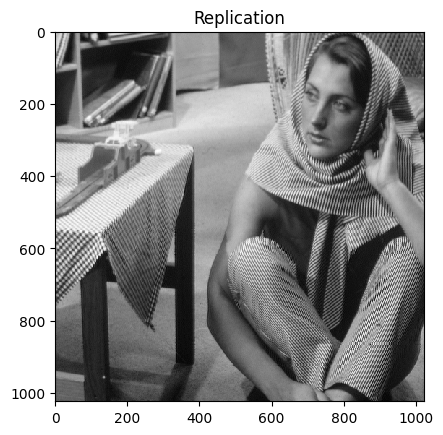

In [60]:
plt.rcParams['image.interpolation'] = 'nearest' # to avoid interpolation that could be done to display the images 

# Load an image
im = io.imread('../standard_test_images/barbara.pgm') # You can test with other images

largeur = im.shape[1]
hauteur = im.shape[0]

# Réplication
im_2x_replic = np.zeros( (hauteur*2,largeur*2) )

for y in range(0, hauteur):
    for x in range(0, largeur):
        xx=x*2
        yy=y*2
        
        im_2x_replic[yy, xx] = im[y,x]
        im_2x_replic[yy, xx+1] = im[y,x]
        im_2x_replic[yy+1, xx] = im[y,x]
        im_2x_replic[yy+1, xx+1] = im[y,x]

plt.figure()
plt.imshow(im_2x_replic, cmap=plt.cm.gray)
plt.title("Replication")

## 2x bilinear interpolation

We will now generate a bit "smarter" code that will perform bilinear interpolation. This means that we need to express each new pixel value as a linear combination of its 4 neignbouring pixels. 

**Question 12:** Complete the code below to perform a 2x bilinear interpolation (beware, the last row and column are a specific case). Don't forget to comment your code.

/tmp/ipykernel_86790/2111522741.py:26: RuntimeWarning: overflow encountered in scalar add
  im_2x_bilin[yy, xx+1] = (im[y,x]+im[y,nextx])/2
/tmp/ipykernel_86790/2111522741.py:27: RuntimeWarning: overflow encountered in scalar add
  im_2x_bilin[yy+1, xx] = (im[nexty,x]+im[y,x])/2


Text(0.5, 1.0, '2x Bilinear interpolation')

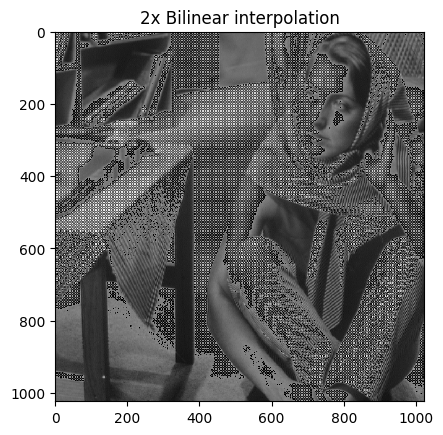

In [63]:
plt.rcParams['image.interpolation'] = 'nearest' # to avoid interpolation that could be done to display the images 
# Load an image
im = io.imread('../standard_test_images/barbara.pgm') # You can test with other images

largeur = im.shape[1]
hauteur = im.shape[0]
        
# 2x Bilinear interpolation
im_2x_bilin = np.zeros( (hauteur*2,largeur*2) )

for y in range(0, hauteur):
    for x in range(0, largeur):
        xx=2*x
        yy=2*y

        im_2x_bilin[yy, xx] = im[y,x]

        nexty = y+1
        if y == hauteur-1:
            nexty = y
        
        nextx = x+1
        if x == largeur-1:
            nextx = x

        im_2x_bilin[yy, xx+1] = (im[y,x]+im[y,nextx])/2
        im_2x_bilin[yy+1, xx] = (im[nexty,x]+im[y,x])/2
        im_2x_bilin[yy+1, xx+1] = (im_2x_bilin[yy, xx+1]+im_2x_bilin[yy+1, xx]+im[nexty,nextx])/3
        
plt.figure()
plt.imshow(im_2x_bilin, cmap=plt.cm.gray)
plt.title("2x Bilinear interpolation")

## General bilinear interpolation

**Question 13:** Modify your existing 2x bilinear interpolation so that it can handle scaling by any integer scaling factor.  Don't forget to comment your code. 
Would it be difficult to generalize to non integer scaling ?

In [ ]:
plt.rcParams['image.interpolation'] = 'nearest' # to avoid interpolation that could be done to display the images 
# Load an image
im = io.imread('../standard_test_images/barbara.pgm') # You can test with other images
im_gris=im[50:150,50:150].astype('int') # let's keep only a small part of the image

largeur = im_gris.shape[1]
hauteur = im_gris.shape[0]

sf=3
        
# Bilinear interpolation
im_bilin = np.zeros( (hauteur*sf,largeur*sf) )

for y in range(0, hauteur):
    for x in range(0, largeur):
        xx=sf*x
        yy=sf*y
        
        for yi in range(0,sf):
            for xi in range(0,sf):
                im_bilin[yy+yi, xx+xi] = # Add your code here
        
plt.figure()
plt.imshow(im_bilin, cmap=plt.cm.gray)
plt.title("Bilinear interpolation")

**Answer 13:**